<a href="https://colab.research.google.com/github/ritazas7/class-work/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
SAMPLE_COUNT = int(1E3)
COEF = 1E-2
a = np.random.rand(SAMPLE_COUNT);
b = np.sin(COEF * np.cumsum(1 / (a - a.mean())))
c = np.cumsum(b - b.mean())

def norm_one(a):
  a -= a.min()
  a /= a.max()
  return a

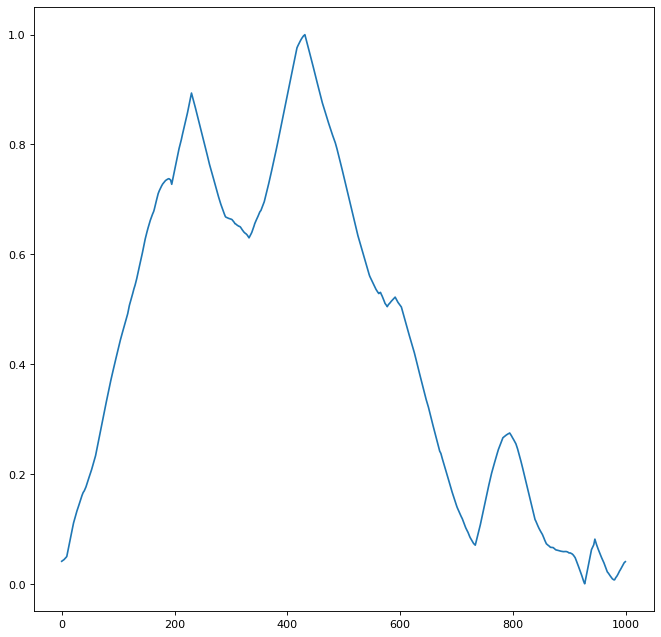

In [3]:
plt.figure(num=None, figsize=(10, 10), dpi=80)

plt.plot(norm_one(c))

In [0]:
NOISE = 2E-1
y = c + NOISE * np.random.rand(SAMPLE_COUNT)

y /= np.random.rand()
y -= 1 / np.random.rand()
X = np.arange(SAMPLE_COUNT) + np.random.rand(SAMPLE_COUNT)
X /= np.random.rand() * SAMPLE_COUNT
X -= 1 / np.random.rand()

In [0]:


class linear_predict:
  
  """
  The object builder shall receive the degree of the coefficients, the learning rate and the options for forms:
  1. poly - for polynomial 
  2. fb - for Furier base.
  3. combined - for combination of 1 and 2.
  """
  
  def __init__(self,degree,learning_rate,form):
    self.degree = degree
    self.form = form
    self.learning_rate = learning_rate
    self.isFitted = False
    
  def _normalize(self,X,y=None):    
    """
    This method normalize the X and y values (if y is provided).
    """
    if y is not None:
      y_normal = y.copy()
      self.y_min = np.min(y_normal)
      y_normal -= self.y_min
      self.y_max = np.max(y_normal)
      y_normal/= self.y_max
    x_normal = X.copy()
    self.x_min = np.min(x_normal)
    x_normal -= self.x_min
    self.x_max = np.max(x_normal)
    x_normal/= self.x_max
    if y is not None:
      return x_normal.reshape(-1,1), y_normal.reshape(-1,1)
    return x_normal.reshape(-1,1)


    
  def _normalize_inversed(self,y_predict_normal):    
    """
    This method reverses the y_normal_predict according to the normalization that we executed before.
    """    
    y_predict_inversed = y_predict_normal.copy()
    y_predict_inversed *= self.y_max
    y_predict_inversed += self.y_min
    return y_predict_inversed
    
        
  def _feature_engineering(self,x_normal):
    
    """
    This method gets x_normal and executes feature_engineering algorithm according to the form that was provided by the user.
    """
    insides = x_normal * 2*np.pi * np.arange(1,self.degree+1)
    poly = x_normal**np.arange(self.degree+1)
    if self.form == "poly":
      x_changed = poly
    elif self.form == "fb":      
      ones = np.ones_like(x_normal)
      x_changed = np.hstack((ones,np.sin(insides),np.cos(insides)))
    elif self.form == "combined":
      x_changed = np.hstack((poly,np.sin(insides),np.cos(insides)))
    return x_changed
  
  def _create_weigths(self):   
    """
    This method randomaly  creates coefficieants between 0 to 1 based on the degree and form that was provided by the user
    """
    if self.form == "poly":
      weights = (np.random.uniform(-0.1, 0.1, size=self.degree+1)).reshape(-1,1)
    elif self.form == "fb":
      weights = np.random.uniform(-0.1,0.1, size=2*self.degree+1).reshape(-1,1)
    elif self.form == "combined":
      weights = np.random.uniform(-0.1,0.1, size=3*self.degree+1).reshape(-1,1)
    return weights 
  
  def fit(self,X,y):
    """
    This method get the features and the labels values from the user and return the best coefficient (for normalizes data).
    It also uses the learning rate value of object.
    """
    
    self.isFitted = True
    x_normal ,y_normal = self._normalize(X,y)
    x_changed = self._feature_engineering(x_normal) 
    weights = self._create_weigths()
    y_predict = np.matmul(x_changed,weights)
    delta = y_normal - y_predict
    error = ((1/2)*(delta**2)).sum()             
    early_stop = 5    
    ok_error= 0.01
    while early_stop > 0 and ok_error > 0.00001:      
      der_error = -delta*(x_changed)
      weights -= self.learning_rate*np.mean(der_error,axis=0).reshape(-1,1)
      y_predict = np.matmul(x_changed,weights)
      delta = y_normal - y_predict
      cur_error = ((1/2)*delta**2).sum()
      ok_error = error-cur_error
      if cur_error < error: 
        error = cur_error
        early_stop = 5
      else :
        early_stop-= 1
    self.best_weights = weights
    return self

  def predict(self,X):
    """
    This method get  features returns list of predited label values, using the coefficients(best_weights)
    """ 
    if  hasattr(self,"best_weights")==False:
      raise NeedToFit("You need to fit before you predict")
    x_normal = self._normalize(X)
    x_changed = self._feature_engineering(x_normal)
    y_predict_normal = np.matmul(x_changed,self.best_weights)
    y_predict_reversed = self._normalize_inversed(y_predict_normal)    
    return y_predict_reversed
  
class NeedToFit(Exception):
  def __init__(self,*args, **kwargs):
    super(NeedToFit,self).__init__(*args, **kwargs)


In [0]:
linear = linear_predict(15,0.5,"combined")

In [0]:
y_predict=linear.fit(X,y).predict(X) 

In [0]:
y_predict = linear.predict(X) 

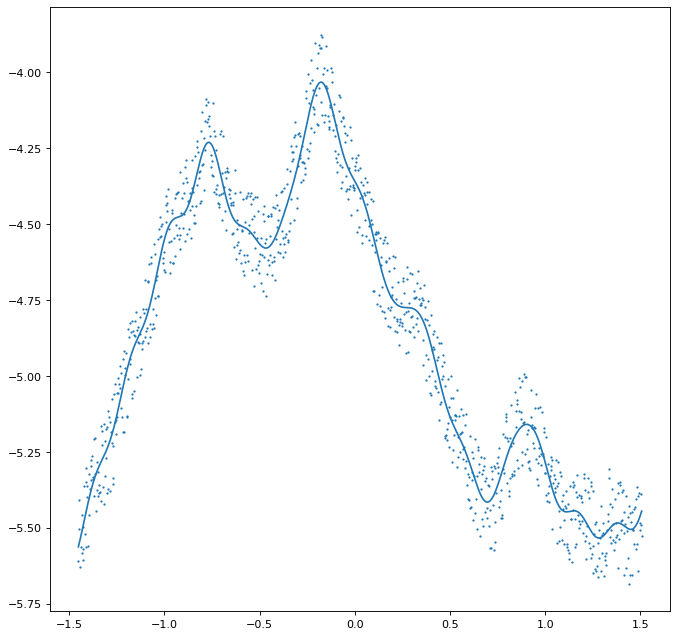

In [9]:
plt.figure(num=None, figsize=(10, 10), dpi=80)
plt.scatter(X, y, s=1)
plt.plot(X,y_predict)